## Identificação e Prevenção de Evasão Estudantil

## Descrição
Uma instituição de ensino superior solicitou que desenvolvêssemos um modelo de Machine Learning destinado a prever a evasão de estudantes, ou seja, prever se as pessoas estudantes estão propensos a abandonar seu curso ou faculdade antes que isso realmente ocorra.

## Objetivo
O objetivo deste projeto é compreender e classificar os estudantes propensos a abandonar ou desistir do curso, utilizando o modelo de RandomForest.
Os dados utilizados neste curso foram obtidos do [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success). Após a obtenção desses dados, eles passaram por adaptações e estão disponíveis na pasta **Dados**. Para melhor informação sobre os dados consultar a [página](https://www.mdpi.com/2306-5729/7/11/146#app2-data-07-00146).


## Bibliotecas e configurações iniciais

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter

pd.set_option('display.max_columns', None)
simplefilter(action='ignore', category=(FutureWarning, UserWarning))

## Carregando os dados

In [2]:
# Carregando os dados.
dados = pd.read_csv('Dados/dados_estudantes.csv')

# Visualizando as primeiras linhas.
dados.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,Taxa de inflação,PIB,Curso,Período,Qualificação prévia,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,1.4,1.74,Animação e Design Multimídia,Diurno,Educação secundária,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,-0.3,0.79,Turismo,Diurno,Educação secundária,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,1.4,1.74,Design de Comunicação,Diurno,Educação secundária,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,-0.8,-3.12,Jornalismo e Comunicação,Diurno,Educação secundária,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,-0.3,0.79,Serviço Social (noturno),Noturno,Educação secundária,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [3]:
# Visualizando as informações do dataset.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

## Análse inicial

### Análise de colunas numéricas

- Idade: A idade média dos estudantes na matrícula é de aproximadamente 23 anos, sendo a idade mínima 17 anos e a idade máxima 70 anos.

- Taxa de Desemprego: A taxa média de desemprego entre os estudantes é de cerca de 11.57%, com valores mínimo e máximo de 7.6% e 16.2%, respectivamente.

- Taxa de Inflação: A taxa média de inflação é de 1.23%, com valores mínimo e máximo de -0.8% e 3.7%, respectivamente.

- PIB: O PIB médio dos estudantes é muito baixo, com uma média próxima de 0, com valores mínimo e máximo de -4.06 e 3.5, respectivamente.

- Desempenho Acadêmico: Os estudantes têm, em média, cerca de 6 disciplinas matriculadas por semestre, com média de notas de 10.64 no primeiro semestre e 10.23 no segundo semestre. A média de disciplinas aprovadas é maior no primeiro semestre (4.7) em comparação com o primeiro (4.43)

In [4]:
dados.describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,7.587816,2.663850,1.382711,2.269935,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,17.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.400000,0.300000,-1.700000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,20.000000,11.100000,1.400000,0.320000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,25.000000,13.900000,2.600000,1.790000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,70.000000,16.200000,3.700000,3.510000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


### Análise de colunas categóricas

A maioria dos estudantes é solteiro, do sexo feminino, não-estrangeiro e não possui necessidades educacionais especiais. A maior parte não é devedora, está com as taxas de matrícula em dia e não é bolsista. O curso mais comum é Enfermagem e a maioria dos estudantes está no período diurno. Em relação a qualificação prévia, a maioria possui em educação secundária (ensino médio). Quanto ao status "target", a maioria dos estudantes estão como graduados.

In [5]:
dados.describe(include='object', exclude='number')

,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


## Análise Exploratória - Dados demográficos

### Estado civil
Podemos observar abaixo que a maioria é solteiro (88%). Em seguida, tem mais pessoas casadas (8,5%) e divorciadas (2%).

In [6]:
dados['Estado civil'].value_counts(normalize=True) * 100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

### Idade na matrícula

No gráfico abaixo, é notável que a maioria das pessoas que realizaram a matrícula tem menos de 20 anos. À medida que as idades avançam, observamos uma diminuição gradual no número de indivíduos.

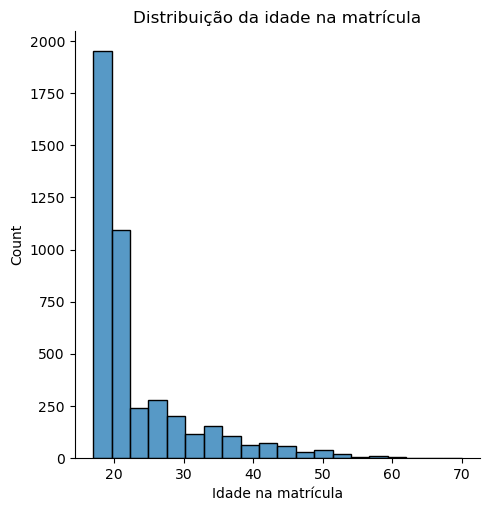

In [7]:
sns.displot(dados, x='Idade na matrícula', bins=20)
plt.title('Distribuição da idade na matrícula')
plt.show()

### Idade na matrícula x Situação

À medida que a idade aumenta, observamos que a proporção de desistentes se torna significativamente maior. Nota-se que, aos 20 anos, as distribuições são bastante semelhantes entre todas as categorias (desistentes, graduando e matriculado), enquanto a área destinada aos desistentes aumenta substancialmente quando a idade avança.

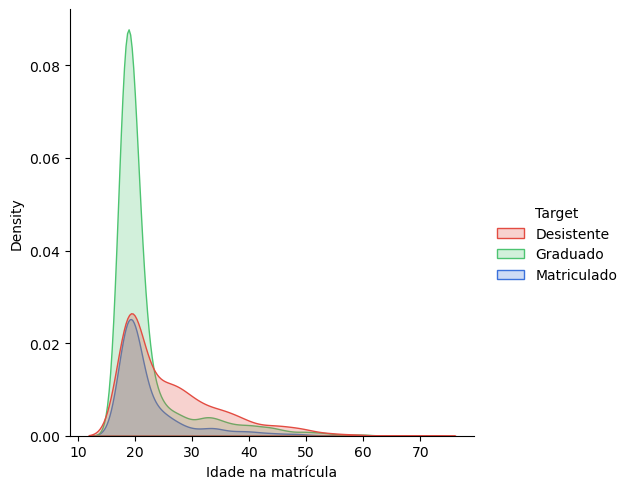

In [8]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

sns.displot(dados, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.show()

### Estrangeiro

A maioria dos estudantes não são estrangeiros (97,5%), ou seja, tem mais estudantes nativos.

In [9]:
dados['Estrangeiro'].value_counts(normalize=True) * 100

Estrangeiro
Não    97.513562
Sim     2.486438
Name: proportion, dtype: float64

### Sexo

Quanto ao sexo, há mais estudantes do sexo feminino (64,8%).

In [10]:
dados['Sexo'].value_counts(normalize=True) * 100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

### Sexo x Situação

No gráfico abaixo, podemos observar que a maioria dos estudantes do sexo masculino encontra-se na categoria de desistentes, seguida pelos graduados, e por último, pelos matriculados.
Quanto as pessoas de sexo feminino, a quantidade de desistentes é menor que a de graduados. Por fim, temos os matriculados. A barra de graduados é a maior de todas.

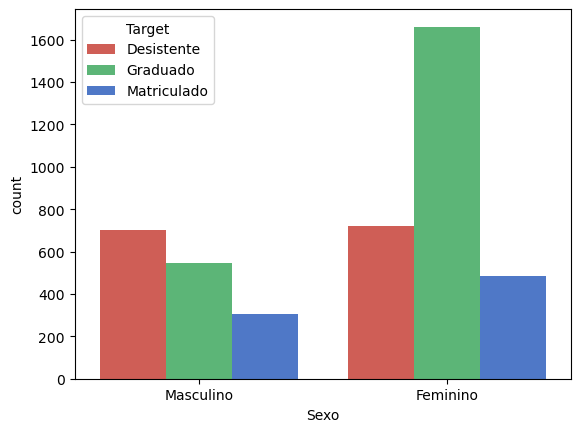

In [11]:
sns.countplot(data=dados, x='Sexo', hue='Target')
plt.show()

## Análise Exploratória - Dados socioeconômicos

### Devedor x Situação
Podemos observar que os não-devedores, a quantidade de desistentes atinge um valor um pouco acima de 1000 e há praticamente o dobro de graduados.
Quanto os devedores, tem mais desistentes em comparação aos graduados e matriculados, o que indica que a falta de recursos financeiros pode ser uma das principais razões para o abandono dos cursos.

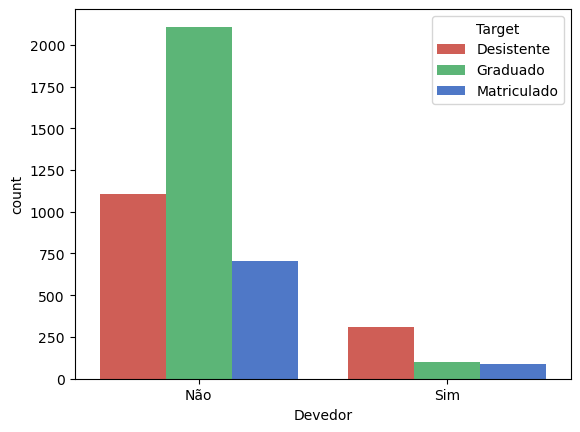

In [12]:
sns.countplot(data=dados, x='Devedor', hue='Target')
plt.show()

### Taxas de matrícula em dia x Situação
Semelhante ao gráfico anterior, quando as taxas de matrícula estão atualizadas, a maioria das pessoas se apresenta como graduadas e quando as taxas de matrícula não estão em dia, a maior proporção se refere às pessoas que desistiram.

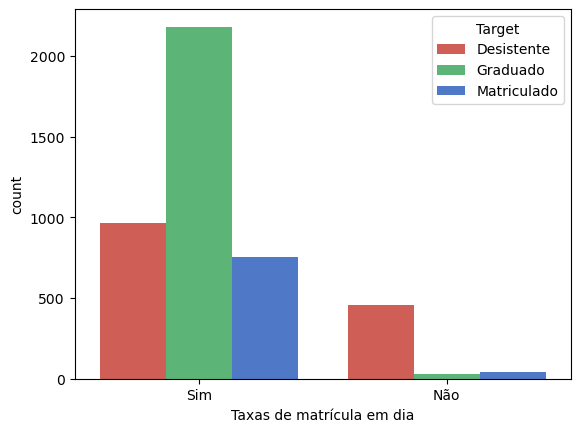

In [13]:
sns.countplot(data=dados, x='Taxas de matrícula em dia', hue='Target')
plt.show()

### Bolsista x Situação

Quando uma pessoa não recebe bolsa de estudos, observamos que o número de desistentes e formandos é semelhante, enquanto a menor coluna representa os matriculados. Quanto os bolsistas, ou seja, está recebendo auxílio financeiro para os estudos, a barra mais alta corresponde às pessoas que estão se formando e são poucas desistências.

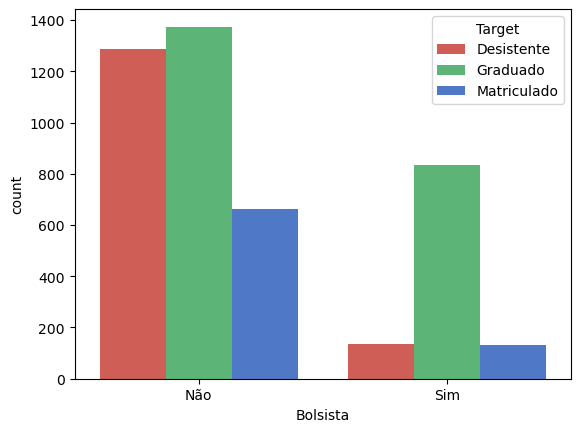

In [14]:
sns.countplot(data=dados, x='Bolsista', hue='Target')
plt.show()

Ao realizar análise dos dados socioeconômicos, é notável que o aspecto econômico pode estar fortemente relacionado à taxa de evasão escolar.